# **CÂU HỎI 3:**
**Nhu cầu việc làm của các lĩnh vực IT theo các khu vực có sự khác nhau hay không? Liệu có sự chênh lệch về lương của các khu vực này theo từng ngành nghề ?**

In [23]:
# import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Đọc dữ liệu từ file `./data.csv` và lưu vào dataframe `df`

In [24]:
df = pd.read_csv('data.csv', index_col='Unnamed: 0')
df.head(5)

,Title,Company,DeadlineHoSo,Salary,Quantity,Hthuc,CapBac,GioiTinh,KinhNghiem,DiaChi,Skill,JobData
0,Business Analyst,Asilla Việt Nam,2023-01-31,"(1200, 1400)",5,Toàn thời gian,Nhân viên,Không yêu cầu,3.0,"Cầu Giấy,Hà Nội",NaN,- Collaborate with Product Manager to understa...
1,Android Developer,FPT Software,2023-04-30,NaN,5,Toàn thời gian,Nhân viên,Không yêu cầu,3.0,"Hà Nội,Cầu Giấy,Thạch Thất",NaN,"• Working in Global delivery team (US, China, ..."
2,Nhân Viên IT,Công ty CPXD&PTHT Tây Hồ,2023-01-30,NaN,1,Toàn thời gian,Nhân viên,Nam,0.0,"Vĩnh Phúc,TP Vĩnh Yên",NaN,Chịu trách nhiệm giám sát hoạt động pho...
3,Chuyên Viên Quản Trị Cơ Sở Dữ Liệu (Database A...,Ngân Hàng Thương Mại Cổ Phần Kiên Long,2023-01-31,"(600.0, 1200.0)",1,Toàn thời gian,Nhân viên,Nam,3.0,"Hà Nội,Nam Từ Liêm","Linux,Oracle,SQL,Unix","Hệ thống cơ sở dữ liệu Oracle,Hệ thống Oracle ..."
4,Java Developer,CÔNG TY TNHH YOUMED VIỆT NAM,2023-01-31,NaN,3,Toàn thời gian,Nhân viên,Không yêu cầu,1.0,"Hồ Chí Minh,Quận 10","Java,Message Queue,Back-End Web Development","Phát triển tính năng đặt khám, telemedicine, s..."


## 1. Tiền xử lý dữ liệu cho câu hỏi 

Ta sẽ chuyển sang dataframe khác để không ảnh hưởng đến `df`

In [25]:
temp_df = df

Đầu tiên, ta sẽ phân loại các ngành nghề từ mục `'Title'`, các ngành nghề sẽ được phân loại thành các mục sau:
- Design
- Management
- Product and Business
- Security
- Help Desk
- Testing
- Infrastructure
- Data & Ai
- Software
- Khác

Chuyển mục title sang chữ thường để phân loại dễ hơn

In [26]:
temp_df['Title'] = temp_df['Title'].str.lower()

In [27]:
temp_df['Title'].unique()

array(['business analyst', 'android developer', 'nhân viên it',
       'chuyên viên quản trị cơ sở dữ liệu (database administrator)',
       'java developer', 'nhân sự', 'tester', 'backend developer',
       'system engineer', 'lập trình viên', 'lập trình viên php',
       'kỹ sư an ninh bảo mật (không yêu cầu kinh nghiệm)',
       'php developer', 'magento developer', 'it support', 'developer',
       'digital marketing', 'unity developer', 'fullstack developer',
       'internship công nghệ thông tin', 'java', 'product manager',
       'kĩ thuật viên lương từ 15tr', 'nhân viên quản trị mạng',
       'qc engineer',
       'chuyên viên an ninh thông tin (có thể đi làm sau tết) - thu nhập lên đến 480 triệu/năm',
       'trưởng phòng it', 'python',
       'khai thác ứng dụng & triển khai các giải pháp cntt (có thể đi làm sau tết) - thu nhập lên đến 480 triệu/năm',
       'asp.net', 'nhân viên phát triển phần mềm',
       'react native developer', 'ai engineer', 'android',
       'product

Ta sẽ loại bỏ những dòng không có lương để dễ tính lương trung bình của từng ngành nghề theo các khu vực

In [28]:
temp_df.dropna(subset=['Salary'],inplace = True)
temp_df['Salary']

0          (1200, 1400)
3       (600.0, 1200.0)
5            (600, 700)
6            (600, 800)
8          (1600, 1800)
             ...       
2330     (400.0, 600.0)
2331       (1300, 1500)
2332         (600, 700)
2333     (400.0, 800.0)
2334       (1800, 2000)
Name: Salary, Length: 1571, dtype: object

Ta thấy, các thông tin lương là dạng `tuple`, tuy nhiên, khi lưu trữ trong dataframe thì dạng `tuple` được đọc thành 1 string.

Do đó, ta sẽ chuyển dữ liệu `tuple` thành một `list` chứa 2 mức lương mà công việc đề xuất.

In [29]:
def convert_list(sal):
    sal = sal.replace('(','')
    sal = sal.replace(')','')
    return list(map(float,sal.split(',')))

In [30]:
temp_df['Salary'] = temp_df['Salary'].apply(convert_list)

## 2. Trả lời câu hỏi

Các từ khoá để phân loại

In [31]:
software = ['developer','java','python','.net','phần mềm','android','software',
            'js','ruby on rails','lập trình','ứng dụng','end','mobile','react native',
            'unity','coder','ios','angular','c/c++','web','app','golang','embedded','flutter']
product_business = ['business','product']
manage = ['manager','lead','trưởng','management']
design = ['design','thiết kế']
security = ['an ninh','security','an toàn']
helpdesk = ['help','hỗ trợ','support','desk']
testing = ['test','qc','kiểm thử','qa','quality control']
infrastructure = ['system','hệ thống','mạng','devops','dev ops','administrator','server','quản trị']
data_ai = ['data','dữ liệu','ai','cloud','trí tuệ','computer']

### Kiểm tra `title` chứa từ khoá nào thì phân loại vào mục đó

In [32]:
def category_it(title):
    if any(d in title for d in design):
        return 'Design'
    elif any(m in title for m in manage):
        return 'Management'
    elif any(p in title for p in product_business):
        return 'Product and Business'
    elif any(s in title for s in security):
        return 'Security'
    elif any(h in title for h in helpdesk):
        return 'Help Desk'
    elif any(t in title for t in testing):
        return 'Testing'
    elif any(i in title for i in infrastructure):
        return 'Infrastructure'
    elif any(d in title for d in data_ai):
        return 'Data & Ai'
    elif any(s in title for s in software):
        return 'Software'
    return 'Khac'

In [33]:
temp_df['Loai'] = temp_df['Title'].apply(category_it)

### Tiếp đến, ta phân loại khu vực dựa trên địa chỉ, ta phân loại các khu vực sau:
- Hà Nội
- Đà Nẵng
- Hồ Chí Minh
- Khác

In [34]:
temp_df['DiaChi'].unique()

array(['Cầu Giấy,Hà Nội', 'Hà Nội,Nam Từ Liêm', 'Hà Nội',
       'Hà Nội,Đống Đa', 'Hà Nội,Cầu Giấy', 'Nghệ An,TP Vinh',
       'Nam Từ Liêm,Hà Nội', 'Hà Nội,Ba Đình',
       'Hà Nội,Hồ Chí Minh,Bình Dương,Bắc Ninh,Đồng Nai,Hưng Yên,Hải Dương,Đà Nẵng,Hải Phòng,Bình Thuận,An Giang,Bắc Kạn,Bà Rịa-Vũng Tàu,Bắc Giang,Cà Mau,Bạc Liêu,Bến Tre,Bình Định,Bình Phước,Cao Bằng,Điện Biên,Cần Thơ,Đồng Tháp,Hà Giang,Gia Lai,Cửu Long,Đắk Lắk,Đắc Nông,Hà Nam,Hậu Giang,Kiên Giang,Hà Tĩnh,Lâm Đồng,Kon Tum,Hoà Bình,Khánh Hoà,Lai Châu,Lạng Sơn,Long An,Nam Định,Nghệ An,Lào Cai,Ninh Bình,Phú Thọ,Phú Yên,Quảng Bình,Quảng Nam,Quảng Ngãi,Ninh Thuận,Quảng Trị,Thanh Hoá,Quảng Ninh,Sơn La,Tây Ninh,Thái Bình,Thái Nguyên,Thừa Thiên Huế,Tiền Giang,Tuyên Quang,Sóc Trăng,Trà Vinh,Vĩnh Phúc,Vĩnh Long',
       'Hồ Chí Minh,Quận 1', 'Cầu Giấy,Hoàng Mai,Cẩm Lệ,Hà Nội,Đà Nẵng',
       'Hồ Chí Minh,Quận 7', 'Tân Bình,Hồ Chí Minh', 'Thạch Thất,Hà Nội',
       'Cầu Giấy,Hoàng Mai,Hà Nội', 'Hà Nội,Thanh Xuân',
       'Thủ Đức,

In [35]:
def set_location(location):
    if 'Hà Nội' in location and 'Hồ Chí Minh' in location and 'Đà Nẵng' in location:
        return 'Cả 3'
    elif 'Hà Nội' in location and 'Hồ Chí Minh' in location:
        return 'hn-hcm'
    elif 'Hà Nội' in location and 'Đà Nẵng' in location:
        return 'hn-dn'
    elif 'Hồ Chí Minh' in location and 'Đà Nẵng' in location:
        return 'hcm-dn'
    elif 'Hà Nội' in location:
        return 'hn'
    elif 'Đà Nẵng' in location:
        return 'dn'
    elif 'Hồ Chí Minh' in location:
        return 'hcm'
    return 'Khác'

In [36]:
temp_df['KhuVuc'] = temp_df['DiaChi'].apply(set_location)

### Tiếp đến, ta tính số lượng bài đăng theo từng khu vực

In [37]:
hn_job = temp_df[(temp_df['KhuVuc'] == 'hn') | (temp_df['KhuVuc'] == 'hn-dn') | ((temp_df['KhuVuc'] == 'hn-hcm')) | (temp_df['KhuVuc'] == 'Cả 3')]['Loai'].value_counts()
dn_job = temp_df[(temp_df['KhuVuc'] == 'dn') | (temp_df['KhuVuc'] == 'hn-dn') | ((temp_df['KhuVuc'] == 'hcm-dn'))| (temp_df['KhuVuc'] == 'Cả 3')]['Loai'].value_counts()
hcm_job = temp_df[(temp_df['KhuVuc'] == 'hcm') | (temp_df['KhuVuc'] == 'hcm-dn') | ((temp_df['KhuVuc'] == 'hn-hcm'))| (temp_df['KhuVuc'] == 'Cả 3')]['Loai'].value_counts()
other_job = temp_df[(temp_df['KhuVuc'] == 'Khác')]['Loai'].value_counts()

### ***Trực quan hoá dữ liệu và đưa ra kết luận***

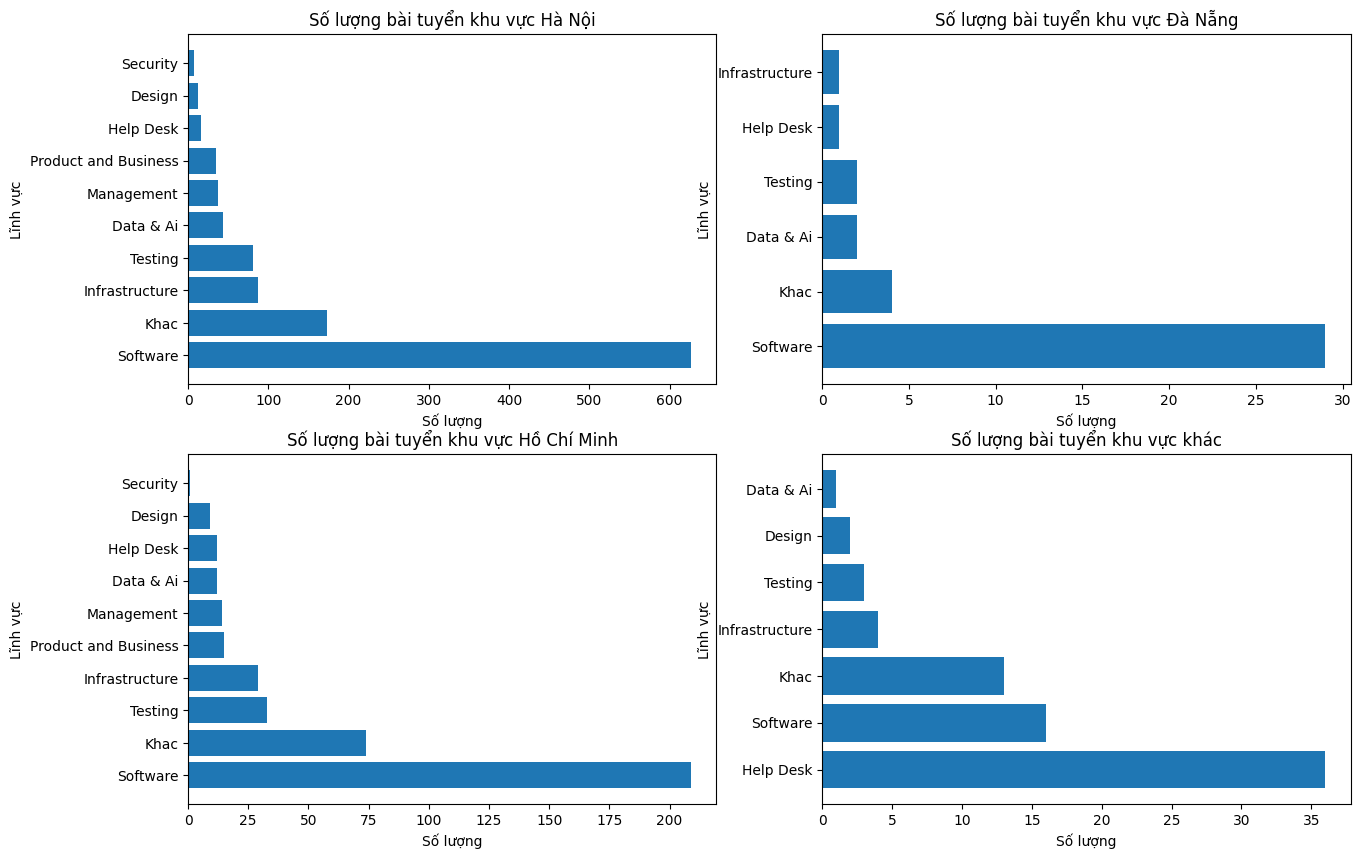

In [38]:
fig,ax = plt.subplots(2,2,figsize = (15,10))

ax[0,0].barh(hn_job.index,hn_job.values)
ax[0,0].set_title('Số lượng bài tuyển khu vực Hà Nội')
ax[0,0].set(xlabel='Số lượng', ylabel='Lĩnh vực')

ax[0,1].barh(dn_job.index,dn_job.values)
ax[0,1].set_title('Số lượng bài tuyển khu vực Đà Nẵng')
ax[0,1].set(xlabel='Số lượng', ylabel='Lĩnh vực')

ax[1,0].barh(hcm_job.index,hcm_job.values)
ax[1,0].set_title('Số lượng bài tuyển khu vực Hồ Chí Minh')
ax[1,0].set(xlabel='Số lượng', ylabel='Lĩnh vực')

ax[1,1].barh(other_job.index,other_job.values)
ax[1,1].set_title('Số lượng bài tuyển khu vực khác')
ax[1,1].set(xlabel='Số lượng', ylabel='Lĩnh vực')

plt.show()

**NHẬN XÉT:**
- Ở 3 khu vực lớn là Hà Nội, Đà Nẵng, TP.HCM, nhu cầu tuyển dụng software là cao vượt trội so với các ngành nghề khác. Chứng tỏ đây là lĩnh vực trọng yếu của các khu vực này. 
- Theo sau đó là các ngành nghề như Testing, Infrastructure... Tuy nhiêu, ở những nơi khác, nhu cầu tuyển dụng software lại không cao bằng mà chủ yếu tuyển công việc hỗ trợ như là HelpDesk. 
- Hà Nội có số bài đăng tuyển dụng vượt trội so với các nơi khác.

### Tiếp theo ta tính lương trung bình của từng ngành nghề theo các khu vực

Tính mức lương ở khoảng giữa

In [39]:
def avesalary(salary):
    return (int(salary[0]) + int(salary[1]))/2

temp_df['AveSal'] = temp_df['Salary'].apply(avesalary)

Ta sẽ gom nhóm các mức lương theo `'KhuVuc'` và `'Loai'`

In [40]:
temp_df.groupby(['KhuVuc','Loai'])['AveSal'].mean()

KhuVuc  Loai                
Cả 3    Data & Ai                340.000000
        Khac                     440.000000
        Software                1980.000000
Khác    Data & Ai                170.000000
        Design                   495.000000
        Help Desk                386.666667
        Infrastructure           930.000000
        Khac                     426.153846
        Software                 503.125000
        Testing                  466.666667
dn      Help Desk                160.000000
        Infrastructure          1900.000000
        Khac                     630.000000
        Software                1420.000000
hcm     Data & Ai                801.000000
        Design                   700.000000
        Help Desk                609.166667
        Infrastructure          1106.153846
        Khac                     525.538462
        Management              1759.090909
        Product and Business     760.000000
        Security                1100.000000
   

Chọn ra các khu vực chính (HN, ĐN, TP.HCM, và các khu vực còn lại)

In [41]:
hn_sal = temp_df[(temp_df['KhuVuc'] == 'hn') | (temp_df['KhuVuc'] == 'hn-dn') | ((temp_df['KhuVuc'] == 'hn-hcm')) | (temp_df['KhuVuc'] == 'Cả 3')]
dn_sal = temp_df[(temp_df['KhuVuc'] == 'dn') | (temp_df['KhuVuc'] == 'hn-dn') | ((temp_df['KhuVuc'] == 'hcm-dn'))| (temp_df['KhuVuc'] == 'Cả 3')]
hcm_sal = temp_df[(temp_df['KhuVuc'] == 'hcm') | (temp_df['KhuVuc'] == 'hcm-dn') | ((temp_df['KhuVuc'] == 'hn-hcm'))| (temp_df['KhuVuc'] == 'Cả 3')]
other_sal = temp_df[(temp_df['KhuVuc'] == 'Khác')]

Tiếp tục gom nhóm theo `'Loai'` và tính lương theo `mean()`

In [42]:
hn_sal = hn_sal.groupby(['Loai'])['AveSal'].mean()
dn_sal = dn_sal.groupby(['Loai'])['AveSal'].mean()
hcm_sal = hcm_sal.groupby(['Loai'])['AveSal'].mean()
other_sal = other_sal.groupby(['Loai'])['AveSal'].mean()

### ***Trực quan hoá dữ liệu và đưa ra kết luận***

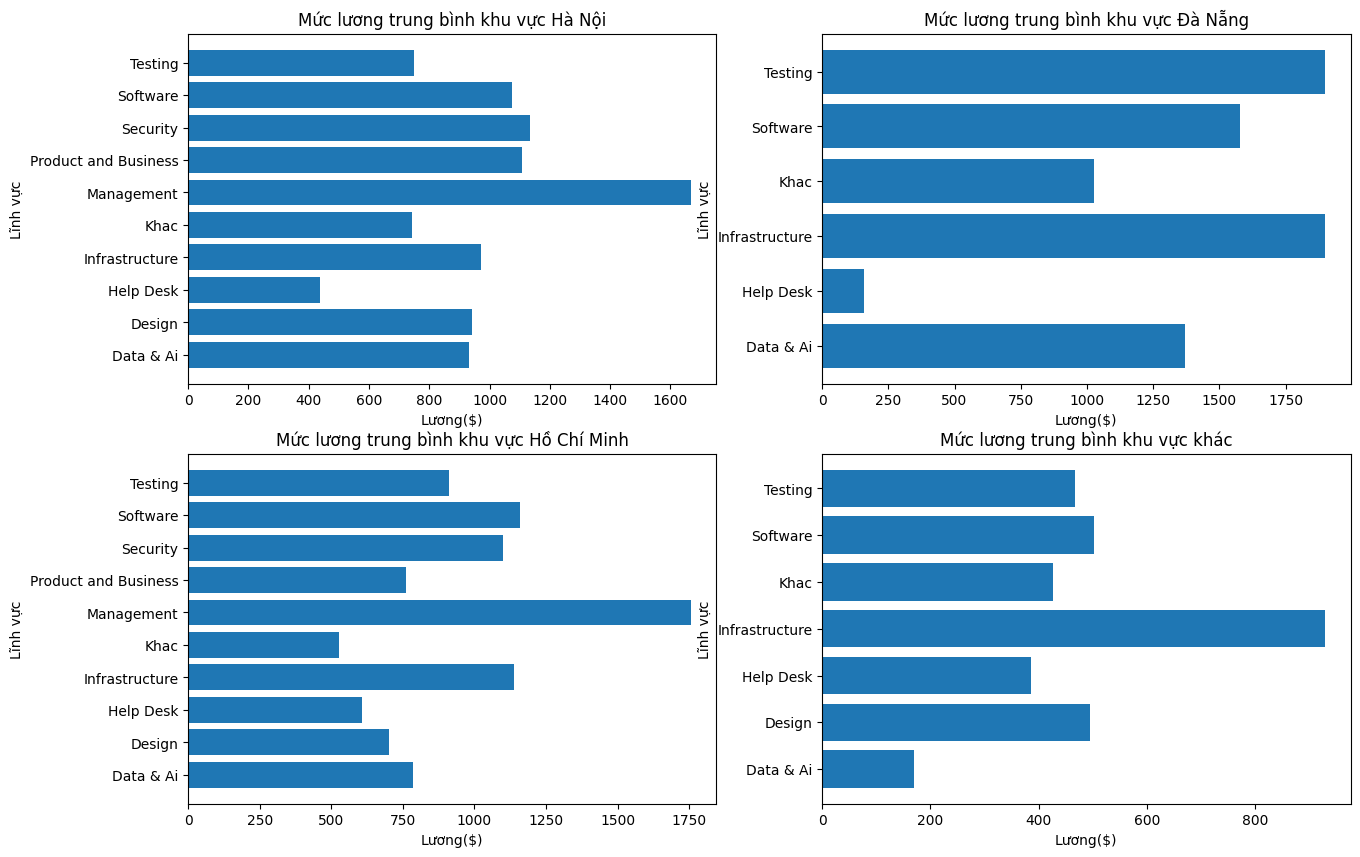

In [43]:
fig,ax = plt.subplots(2,2,figsize = (15,10))

ax[0,0].barh(hn_sal.index,hn_sal.values)
ax[0,0].set_title('Mức lương trung bình khu vực Hà Nội')
ax[0,0].set(xlabel='Lương($)', ylabel='Lĩnh vực')

ax[0,1].barh(dn_sal.index,dn_sal.values)
ax[0,1].set_title('Mức lương trung bình khu vực Đà Nẵng')
ax[0,1].set(xlabel='Lương($)', ylabel='Lĩnh vực')

ax[1,0].barh(hcm_sal.index,hcm_sal.values)
ax[1,0].set_title('Mức lương trung bình khu vực Hồ Chí Minh')
ax[1,0].set(xlabel='Lương($)', ylabel='Lĩnh vực')

ax[1,1].barh(other_sal.index,other_sal.values)
ax[1,1].set_title('Mức lương trung bình khu vực khác')
ax[1,1].set(xlabel='Lương($)', ylabel='Lĩnh vực')

plt.show()

**NHẬN XÉT:** 
- Những khu vực vào có ngành Manage thì lương của ngành này sẽ là cao nhất. Đơn giản là đây là ngành có cấp bậc cao, đòi hỏi năng lực lãnh đạo. 
- Một số ngành đặc thù tuyển ít nên có mức lương cao như Infrastructure, security. Software là ngành tuyển nhiều nhất cũng có mức lương khá ổn khi nằm ở trung bình trên. 
- Khá bất ngờ là ngành hot như Data & AI lại không có mức lương cao lắm, thậm chí nhu cầu tuyển dụng cũng không quá nhiều